#Bioacoustics AIMs 2025

#Instructions on how to use this notebook
This notebook is hosted on ``Google Colab``. To be able to work on it, you have to create your own copy. Go to *File* and select *Save a copy in Drive*.

You can also avoid using ``Colab`` entirely, and download the notebook to run it on your own machine. If you choose this, go to *File* and select *Download .ipynb*.

#Introduction


In this assignment we are going to explore the basics of extracting features from bird audio sounds

#Import the requirements librairies

In [1]:
#DO NOT REMOVE
!pip install git+https://github.com/google-research/perch-hoplite.git

from perch_hoplite import audio_io
import IPython
import librosa
from librosa import display as librosa_display
from IPython.display import display as ipy_display
from matplotlib import pyplot as plt
import scipy
import numpy as np





  Cloning https://github.com/google-research/perch-hoplite.git to /tmp/pip-req-build-krdowqh7
  Running command git clone --filter=blob:none --quiet https://github.com/google-research/perch-hoplite.git /tmp/pip-req-build-krdowqh7
  Resolved https://github.com/google-research/perch-hoplite.git to commit b075df9dfe2eedbaebfd3e97a52b4cffe3569fe2
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


#Fetching an audio sample

In this section we will use code from the [Google Perch Hoplite repository](https://github.com/google-research/perch-hoplite) to load audio data. You can find convenient functions for loading audio in the [audio_io.py file](https://github.com/google-research/perch-hoplite/blob/main/perch_hoplite/audio_io.py)


For audio sounds, explore [Xenocanto](https://xeno-canto.org/) and find an interesting bird recordings. Select the id of the recording and add it below.

Original sample rate: 32000 Hz
Target sample rate: 32000 Hz
Audio shape: (278320,)
Audio duration: 8.70 seconds


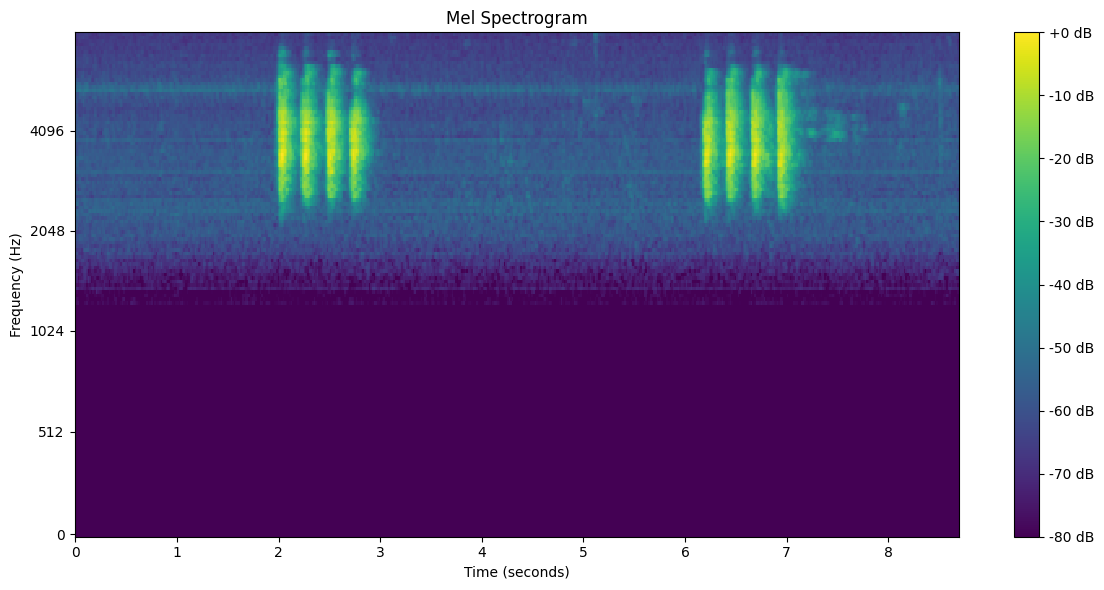

In [8]:
# @title Fetch an audio example. { vertical-output: true }


# --- Configuration ---
xeno_canto_id = "xc1034304"  # @param
sample_rate_hz = 32_000
frame_rate = 100
n_mels = 128
f_max = 8000

# --- 1. Load Audio ---
# Load audio from Xeno-Canto given an ID.
# Returns the signal as a tensor and the sample rate.
audio_tensor = audio_io.load_xc_audio(xeno_canto_id, sample_rate=sample_rate_hz)

# Store the sample rate explicitly for clarity
original_sample_rate = sample_rate_hz

# Print basic information about the audio
print(f"Original sample rate: {original_sample_rate} Hz")
print(f"Target sample rate: {sample_rate_hz} Hz")
print(f"Audio shape: {audio_tensor.shape}")
print(f"Audio duration: {len(audio_tensor) / sample_rate_hz:.2f} seconds")

# --- 2. Display Audio Player ---
# Create an interactive audio player in the notebook
IPython.display.display(
    IPython.display.Audio(audio_tensor, rate=sample_rate_hz)
)

# --- 3. Compute Mel Spectrogram ---
# Compute the mel spectrogram using librosa
mel_spec = librosa.feature.melspectrogram(
    y=np.array(audio_tensor),
    sr=sample_rate_hz,
    n_mels=n_mels,
    fmax=f_max
)

# Convert to decibel scale for better visualization
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

# --- 4. Plot Visualization ---
plt.figure(figsize=(12, 6))
librosa.display.specshow(
    mel_spec_db,
    sr=sample_rate_hz,
    x_axis='time',
    y_axis='mel',
    fmax=f_max,
    cmap='viridis'
)

plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.show()

Please answer the following questions:

#### Question 1

* What is the sample rate of your audio sample?
* How many channels does your audio sample contain?
* What is the shape of your audio tensor?
* Explain your interpretation of the melspectrogram displayed

**Answer:**

1.   **Sample rate:**  The audio sample rate is 32,000 Hz, meaning the signal captures 32,000 amplitude data points per second.
2.  **Number of channels:** The recording contains 1 channel, indicating it is a mono audio signal (implied by the single dimension in the tensor shape).


1.  **Shape of the audio tensor:** The shape is (278320,). This indicates a 1-dimensional array containing 278,320 samples, corresponding to the short duration of 8.70 seconds.
2.   **Explanation:** This melspectrogram visualizes a short focal recording of roughly 9 seconds. Time spans the x-axis and frequency the y-axis. The dominant dark purple background indicates a generally quiet recording environment with low background noise. Significant bioacoustic activity is distinct and periodic, appearing as two specific events (one between 2–3 seconds and another between 6–7 seconds). These appear as bright yellow clusters of vertical lines, representing high-intensity, rapid trills or pulses concentrated between approximately 2000 Hz and 5000 Hz.







#_Analysis of a window

In this section we select one window from our audio sound and smooth its values using the hanning window function

Window starts at 2.3 seconds
Window contains 4000 samples
Window duration: 125.00 milliseconds


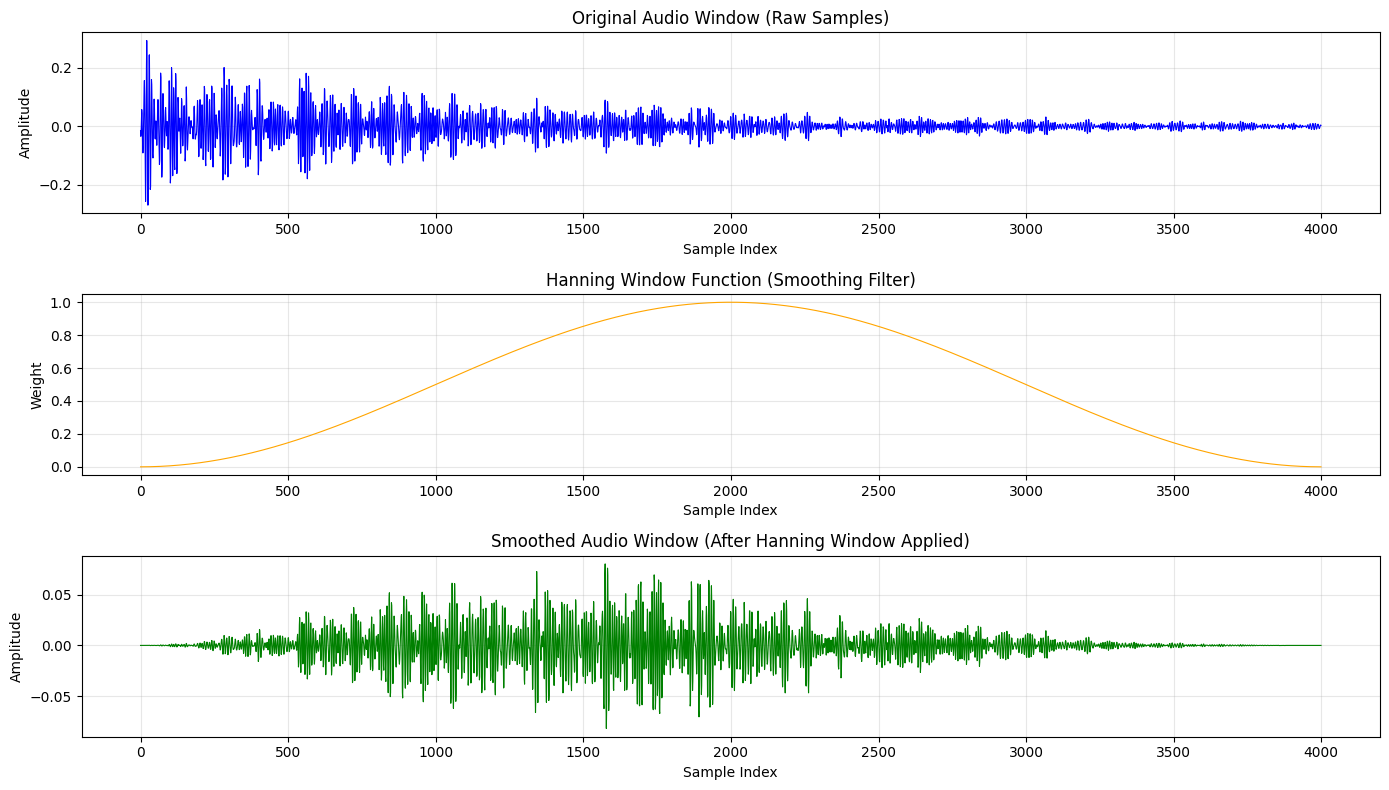


--- Audio Player (Original Window) ---



--- Audio Player (Smoothed Window) ---


In [12]:
# @title Analyze one audio window. { vertical-output: true }


# --- Configuration ---
# Define parameters for the analysis window
offset_s = 2.3  # @param - start time in seconds
window_size = 2048  # @param - number of samples in the window

# --- 1. Select Audio Window ---
# Calculate the starting index: time (seconds) * sample rate
# Note: sample_rate_hz and audio_tensor are assumed to be defined in previous cells
step = int(offset_s * sample_rate_hz)

# Extract the slice of audio using slice notation
window = audio_tensor[step : step + window_size]

# Calculate duration in milliseconds for display
duration_ms = (len(window) / sample_rate_hz) * 1000

print(f"Window starts at {offset_s} seconds")
print(f"Window contains {len(window)} samples")
print(f"Window duration: {duration_ms:.2f} milliseconds")

# --- 2. Apply Hanning Window ---
# Load Hanning window using scipy to reduce spectral leakage (edge effects)
hanning_window = scipy.signal.windows.hann(window_size)

# Apply the window function to the audio signal
smoothed_window = hanning_window * window

# --- 3. Visualization ---
plt.figure(figsize=(14, 8))

# Plot 1: Original window
plt.subplot(3, 1, 1)
plt.plot(window, color='blue', linewidth=0.8)
plt.title('Original Audio Window (Raw Samples)')
plt.ylabel('Amplitude')
plt.xlabel('Sample Index')
plt.grid(True, alpha=0.3)

# Plot 2: Hanning window function
plt.subplot(3, 1, 2)
plt.plot(hanning_window, color='orange', linewidth=0.8)
plt.title('Hanning Window Function (Smoothing Filter)')
plt.ylabel('Weight')
plt.xlabel('Sample Index')
plt.grid(True, alpha=0.3)

# Plot 3: Smoothed window
plt.subplot(3, 1, 3)
plt.plot(smoothed_window, color='green', linewidth=0.8)
plt.title('Smoothed Audio Window (After Hanning Window Applied)')
plt.ylabel('Amplitude')
plt.xlabel('Sample Index')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# --- 4. Audio Playback ---
# Display audio players for comparison
print("\n--- Audio Player (Original Window) ---")
IPython.display.display(
    IPython.display.Audio(window, rate=sample_rate_hz)
)

print("\n--- Audio Player (Smoothed Window) ---")
IPython.display.display(
    IPython.display.Audio(smoothed_window, rate=sample_rate_hz)
)

Question 2
* What is the purpose of smoothing the values using a windowing function?

**Answer:**
The primary purpose of smoothing the values using a windowing function (like the Hanning window) is to **minimize spectral leakage** before performing frequency analysis (such as the Fast Fourier Transform - FFT).
Here is a some other raison of why this is necessary:
* **Removing Edge Discontinuities:** When
you slice a short window of audio from a longer signal, the start and end points of that slice are abrupt (rectangular). To the mathematical algorithms, these sharp edges look like high-frequency "clicks" or noise that aren't actually part of the original sound.
* **Tapering to Zero:** The windowing function multiplies the signal by a bell curve, smoothly forcing the amplitude to zero at the beginning and the end of the window.
* **Improving Frequency Accuracy:** By smoothing these edges, we prevent "leakage," where energy from one frequency spreads into adjacent frequencies. This results in a much clearer and more accurate spectrogram or frequency spectrum.

#Display frequency components of a window sample

In this section we apply discrete fourier transforms to analyze the frequency components of our audio sound

DFT output shape: (4000,)
DFT output type: complex-valued (has real and imaginary parts)
Power spectrum shape: (4000,)
Power spectrum type: real-valued (all positive numbers)
Positive frequencies shape: (2001,)


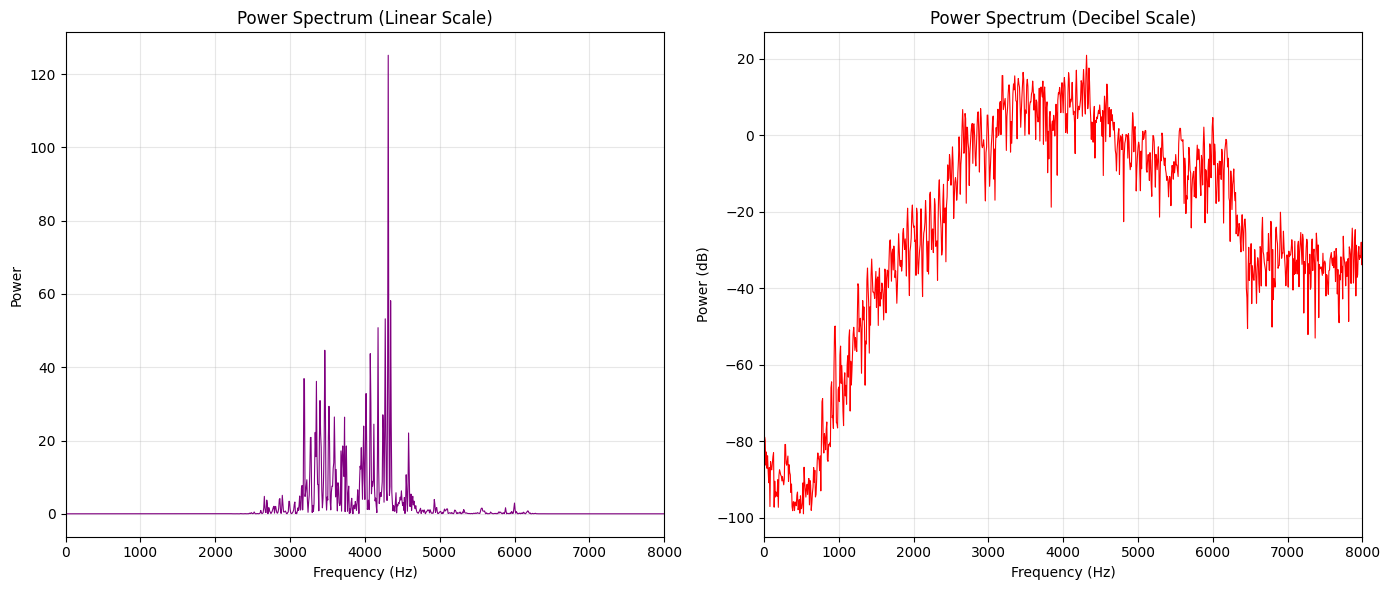

In [13]:
# @title Prepare the windowed frame for frequency analysis { vertical-output: true }


# --- 1. Compute DFT (Discrete Fourier Transform) ---
# Prepare the windowed frame for frequency analysis
frame_window = hanning_window * window

# Create a DFT matrix
dft_mat = scipy.linalg.dft(window_size)

# Compute the DFT of the window sample via matrix multiplication
# The DFT converts the time-domain signal into frequency components
dft_output = dft_mat @ frame_window

print(f"DFT output shape: {dft_output.shape}")
print("DFT output type: complex-valued (has real and imaginary parts)")

# --- 2. Calculate Power Spectrum ---
# Convert the complex-valued output into a power spectrum
# We use absolute value squared to get power from complex numbers
power_spectrum = np.abs(dft_output) ** 2

print(f"Power spectrum shape: {power_spectrum.shape}")
print("Power spectrum type: real-valued (all positive numbers)")

# --- 3. Filter Positive Frequencies ---
# Due to symmetry in the DFT, the second half mirrors the first half.
# We select only the first half (positive frequencies).
positive_freqs = power_spectrum[:window_size // 2 + 1]

print(f"Positive frequencies shape: {positive_freqs.shape}")

# Create frequency axis for plotting
# This converts bin indices to actual frequency values in Hz
freq_axis = np.fft.rfftfreq(window_size, d=1 / sample_rate_hz)

# --- 4. Visualization ---
plt.figure(figsize=(14, 6))

# Plot 1: Linear Scale
plt.subplot(1, 2, 1)
plt.plot(freq_axis, positive_freqs, linewidth=0.8, color='purple')
plt.title('Power Spectrum (Linear Scale)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.grid(True, alpha=0.3)
plt.xlim(0, 8000)  # Focus on audible bird frequencies

# Plot 2: Log Scale (Decibels)
plt.subplot(1, 2, 2)
# Convert to dB, adding a small epsilon (1e-10) to avoid log(0) errors
power_db = 10 * np.log10(positive_freqs + 1e-10)

plt.plot(freq_axis, power_db, linewidth=0.8, color='red')
plt.title('Power Spectrum (Decibel Scale)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (dB)')
plt.grid(True, alpha=0.3)
plt.xlim(0, 8000)

plt.tight_layout()
plt.show()

Question 3

* Why do we convert complex valued output to a power spectrum?
* Why do we select only the positive frequencies of our power spectrum?


**Answer:**

1. The DFT output consists of complex numbers which contain both magnitude (amplitude) and phase (timing) information. We convert this to a power spectrum for two main reasons:

* **Interpretability:** Humans perceive sound
loudness based on the energy of the signal, not the phase. The complex numbers themselves are abstract and cannot be plotted on a standard 2-dimensional graph.

* **Energy visualization**: By calculating the squared magnitude , we get a real number representing the energy or power present at that specific frequency. This tells us how much of that note exists in the audio window.

2. When performing a DFT on a real-valued signal (like audio recording), the output is mathematically symmetric (Hermitian symmetry).

* **Redundancy**: The second half of the DFT array is essentially a mirror image (complex conjugate) of the first half. It contains the exact same magnitude information as the first half.

* **Efficiency:** Since the information is duplicated, we only need the first half (from 0 Hz up to the Nyquist frequency, which is half the sample rate) to fully describe the frequency content of the audio. Negative frequencies are a mathematical concept necessary for the calculation but do not represent distinct physical sounds in this context.

#Create a MelFilterBank

Mel filterbank matrix shape: (128, 2001)
This means: 128 mel bands × 2001 frequency bins


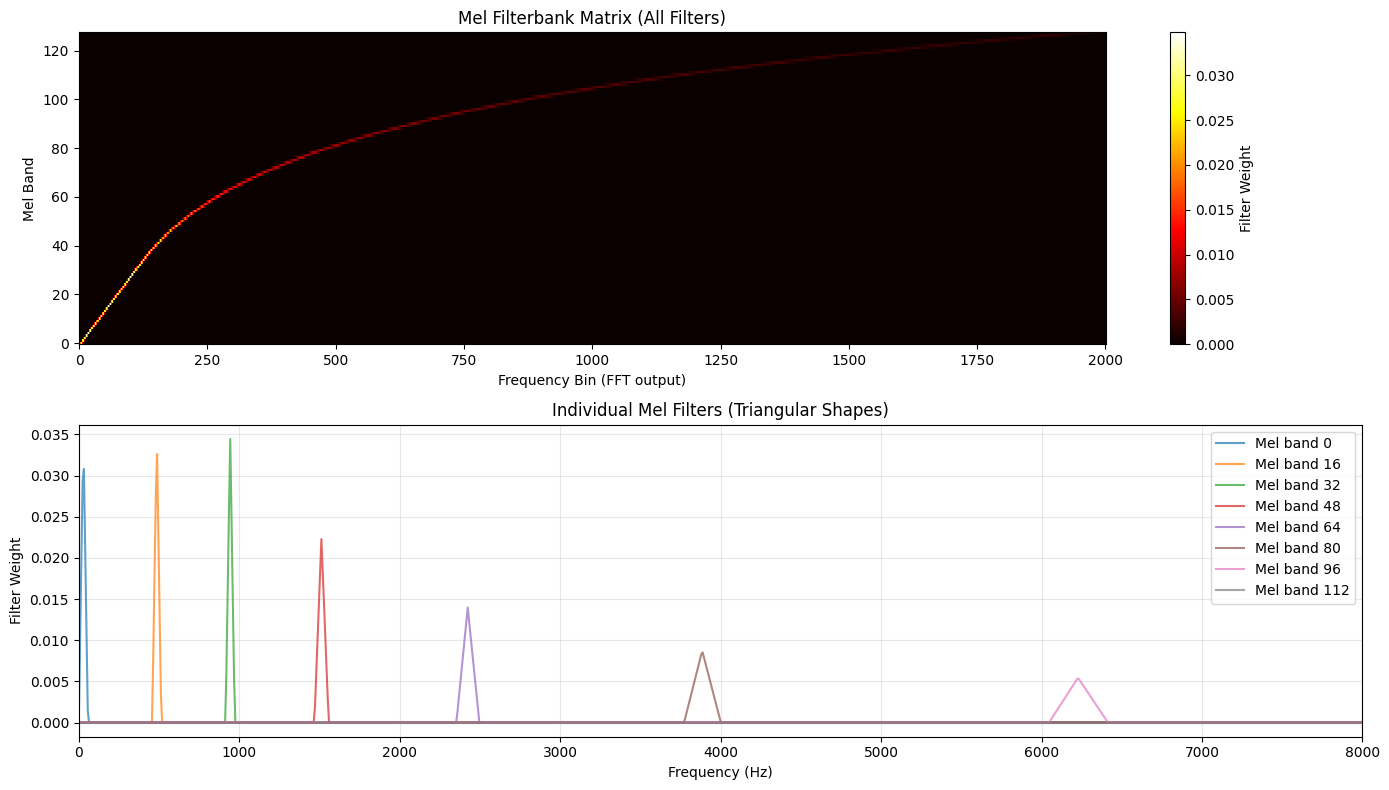

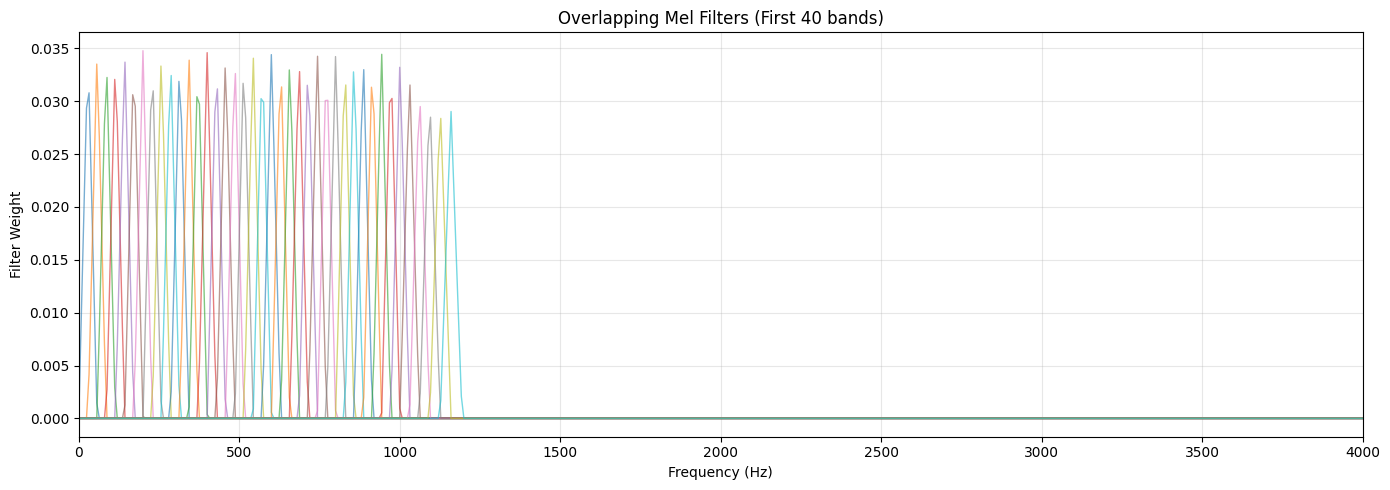

In [14]:
# @title Create and visualize the Mel filterbank. { vertical-output: true }


# --- 1. Create Mel Filterbank Matrix ---
# This converts linear frequency bins to the perceptually-motivated mel scale.
# Note: sample_rate_hz and window_size are assumed defined in previous cells.
n_mels = 128

mel_mat = librosa.filters.mel(
    sr=sample_rate_hz,    # Sample rate
    n_fft=window_size,    # Number of FFT components
    n_mels=n_mels         # Number of mel frequency bands to create
)

print(f"Mel filterbank matrix shape: {mel_mat.shape}")
print(f"This means: {mel_mat.shape[0]} mel bands × {mel_mat.shape[1]} frequency bins")

# --- 2. Visualization Setup ---
# Pre-calculate the frequency axis once for use in plots
# The frequency bins range from 0 to the Nyquist frequency (sample_rate / 2)
freq_bins = np.linspace(0, sample_rate_hz / 2, mel_mat.shape[1])

plt.figure(figsize=(14, 8))

# --- 3. Plot 1: Heatmap of Filterbank ---
plt.subplot(2, 1, 1)
plt.imshow(
    mel_mat,
    aspect='auto',
    origin='lower',
    cmap='hot',
    interpolation='nearest'
)
plt.title('Mel Filterbank Matrix (All Filters)')
plt.xlabel('Frequency Bin (FFT output)')
plt.ylabel('Mel Band')
plt.colorbar(label='Filter Weight')

# --- 4. Plot 2: Individual Triangular Filters ---
plt.subplot(2, 1, 2)

# Plot every 16th filter to avoid overcrowding the visualization
step_size = 16
for i in range(0, mel_mat.shape[0], step_size):
    plt.plot(
        freq_bins,
        mel_mat[i, :],
        label=f'Mel band {i}',
        alpha=0.7
    )

plt.title('Individual Mel Filters (Triangular Shapes)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Filter Weight')
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)
plt.xlim(0, 8000)  # Focus on bird-relevant frequencies

plt.tight_layout()
plt.show()

# --- 5. Plot 3: Overlapping Filters Details ---
plt.figure(figsize=(14, 5))

# Plot the first 40 filters to clearly visualize the overlap pattern
for i in range(40):
    plt.plot(freq_bins, mel_mat[i, :], linewidth=1, alpha=0.6)

plt.title('Overlapping Mel Filters (First 40 bands)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Filter Weight')
plt.grid(True, alpha=0.3)
plt.xlim(0, 4000)

plt.tight_layout()
plt.show()

Question 4
* What is the shape of the melfilterbank matrix?

**Answer:**
The Mel filterbank matrix has a shape of (128, 2001), representing 128 Mel bands across 2,001 frequency bins.

#Apply Mel Matrix on Spectrogram

Original spectrogram shape: (2001, 140)
This represents 140 time frames × 2001 frequency bins
Mel spectrogram shape: (128, 140)
This represents 140 time frames × 128 mel bands


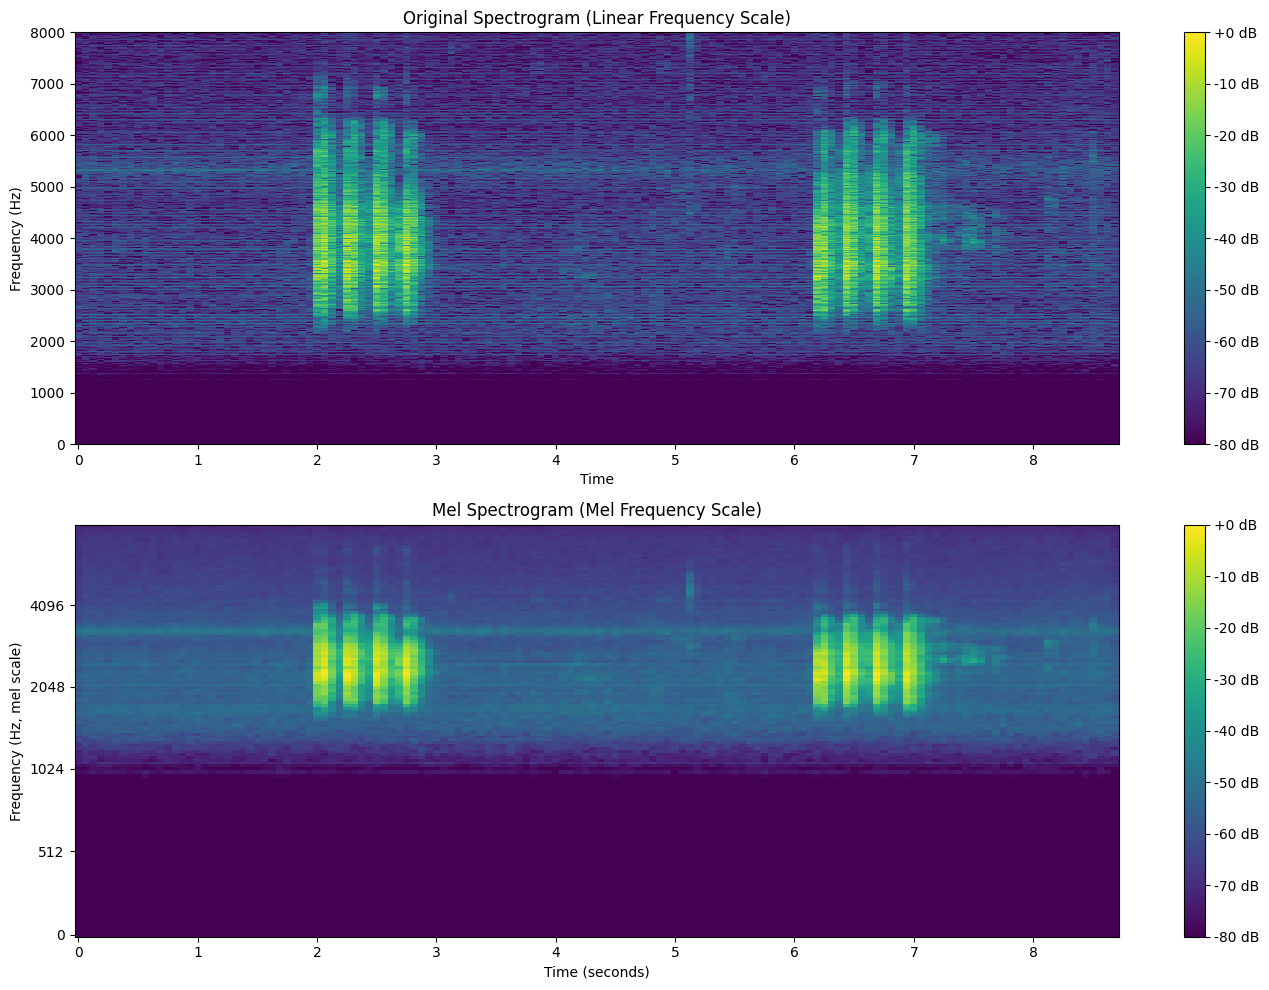

In [15]:
# @title Compute and visualize STFT vs Mel Spectrogram { vertical-output: true }

# --- 1. Compute Short-Time Fourier Transform (STFT) ---
# Define the hop length (distance between window centers)
# 50% overlap is standard (window_size // 2)
hop_length = window_size // 2

# Compute STFT
# We convert audio_tensor to a numpy array to ensure compatibility
stft = librosa.stft(
    np.array(audio_tensor),
    n_fft=window_size,
    hop_length=hop_length,
    window='hann'
)

# Get the magnitude (power) spectrogram
# We square the absolute value of the complex STFT output
magnitude_spec = np.abs(stft) ** 2

print(f"Original spectrogram shape: {magnitude_spec.shape}")
print(f"This represents {magnitude_spec.shape[1]} time frames × {magnitude_spec.shape[0]} frequency bins")

# --- 2. Apply Mel Filterbank ---
# Convert from linear frequency to mel scale using matrix multiplication.
# Operation: (Mel Bands x Freq Bins) @ (Freq Bins x Time Frames)
# Note: mel_mat must have been created with the same n_fft/window_size
mel_spectrogram = mel_mat @ magnitude_spec

print(f"Mel spectrogram shape: {mel_spectrogram.shape}")
print(f"This represents {mel_spectrogram.shape[1]} time frames × {mel_spectrogram.shape[0]} mel bands")

# --- 3. Convert to Decibels ---
# Convert to decibel scale (log scale) for better visualization of loudness
mel_spec_db = librosa.power_to_db(mel_spectrogram, ref=np.max)
magnitude_spec_db = librosa.power_to_db(magnitude_spec, ref=np.max)

# --- 4. Visualization ---
plt.figure(figsize=(14, 10))

# Plot 1: Original linear-frequency spectrogram
plt.subplot(2, 1, 1)
librosa.display.specshow(
    magnitude_spec_db,
    sr=sample_rate_hz,
    hop_length=hop_length,
    x_axis='time',
    y_axis='linear',
    cmap='viridis'
)
plt.colorbar(format='%+2.0f dB')
plt.title('Original Spectrogram (Linear Frequency Scale)')
plt.ylabel('Frequency (Hz)')
plt.ylim(0, 8000)

# Plot 2: Mel-scaled spectrogram
plt.subplot(2, 1, 2)
librosa.display.specshow(
    mel_spec_db,
    sr=sample_rate_hz,
    hop_length=hop_length,
    x_axis='time',
    y_axis='mel',
    fmax=8000,
    cmap='viridis'
)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram (Mel Frequency Scale)')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency (Hz, mel scale)')

plt.tight_layout()
plt.show()